In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [141]:
df = pd.read_csv('adult_data.csv')
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [142]:
def handleCapitalGain(df):
    df['capital_gain'] = np.where(df['capital_gain'] == 0, np.nan, df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan,0)
    

In [143]:
handleCapitalGain(df)
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
24001,23,Private,112819,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0.000000,0,40,United-States,<=50K
5874,59,Private,108496,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,7.974877,0,40,United-States,<=50K
6178,60,?,153072,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0.000000,0,5,United-States,<=50K
16358,50,Private,166565,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0,50,United-States,<=50K
8359,35,Private,36214,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.386173,0,47,United-States,>50K


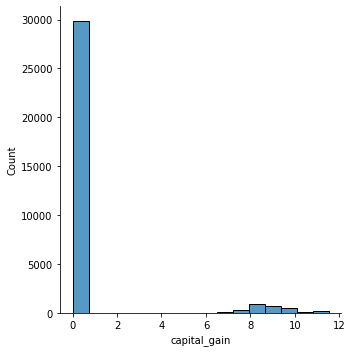

In [144]:
sns.displot(df['capital_gain'])

In [145]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.734601,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,2.454680,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,11.512915,4356.000000,99.000000


In [146]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [147]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [148]:
df['salary'] = np.where(df['salary'] == ">50K" ,1,df.salary)
df['salary'] = np.where(df['salary'] == "<=50K" ,0,df.salary)
df['salary']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

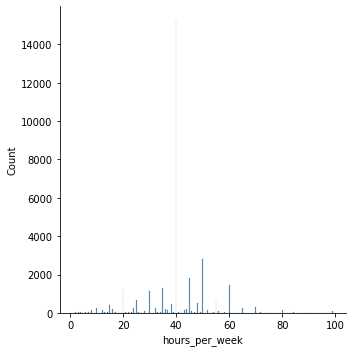

In [149]:
sns.displot(df.hours_per_week)

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

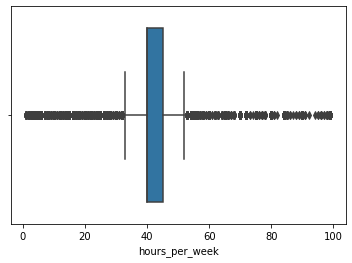

In [150]:
sns.boxplot(df.hours_per_week)

In [151]:
def remove_outliers(df,feature):
    sf = df[feature].quantile(0.75)
    tf = df[feature].quantile(0.25)
    IQR = sf-tf

    ll = tf-1.5*IQR
    ul = sf+1.5*IQR

    df[feature] = np.where(df[feature]<=ll , ll, df[feature] )
    df[feature] = np.where(df[feature]>=ul , ul, df[feature] )



In [152]:
remove_outliers(df,'hours_per_week')

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

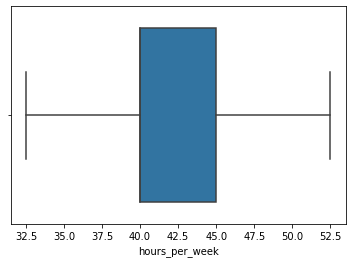

In [153]:
sns.boxplot(df.hours_per_week)

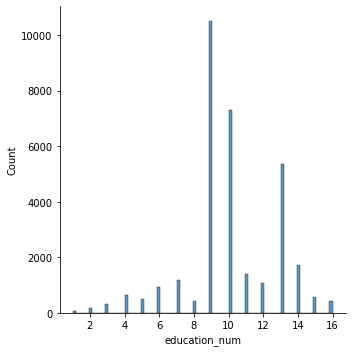

In [154]:
sns.displot(df.education_num)

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

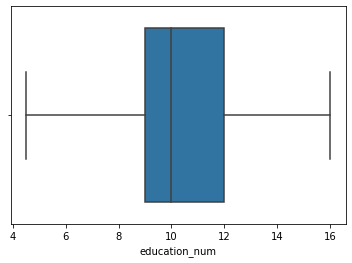

In [155]:
remove_outliers(df,'education_num')
sns.boxplot(df.education_num)

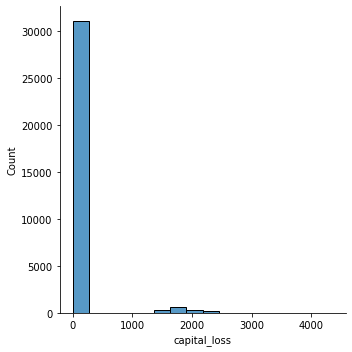

In [156]:
sns.displot(df.capital_loss)

In [157]:
df.capital_loss = np.where(df.capital_loss==0,np.nan,df.capital_loss)
df.capital_loss = np.log(df.capital_loss)
df.capital_loss = df.capital_loss.replace(np.nan,0)

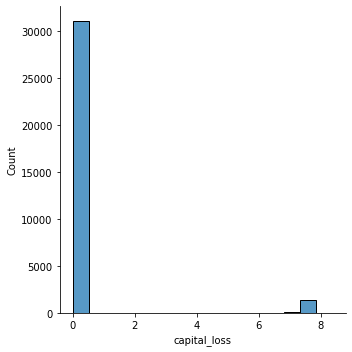

In [158]:
sns.displot(df.capital_loss)

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

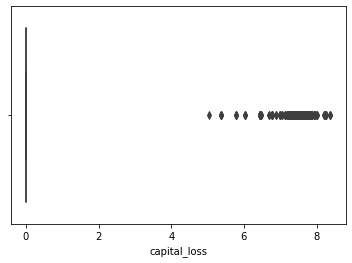

In [159]:
sns.boxplot(df.capital_loss)

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

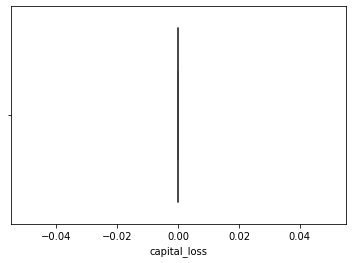

In [160]:
remove_outliers(df,"capital_loss")
sns.boxplot(df.capital_loss)

In [161]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


In [162]:
df.salary.unique()
df.sex.unique()
df.race.unique()
df.relationship.unique()
df.occupation.unique()
df.marital_status.unique()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [163]:

def feature_engineering(df):

    ## convert the salary into 1 if salary is greater then 50K else 0
    df.salary = np.where(df.salary == ' <=50K',0,1)

    ## convert the sex column into 0 and 1, if male then 1 else 0
    df.sex = np.where(df.sex == ' Male',1,0)

    ## do the label encoding in race column (0: 'White',1: 'Black',2: 'Asian-Pac-Islander',3:'Amer-Indian-Eskimo',4:'Other')
    label_enco_race = {value : key for key,value in enumerate(df.race.unique())}
    df.race = df.race.map(label_enco_race)

    ## {0: ' Not-in-family',1: ' Husband'2: ' Wife',3: ' Own-child',4: ' Unmarried',5: ' Other-relative
    label_enco_relation = {value : key for key,value in enumerate(df.relationship.unique())}
    df.relationship = df.relationship.map(label_enco_relation)

    ## {0: ' Adm-clerical',1: ' Exec-managerial',2: ' Handlers-cleaners',3: ' Prof-specialty',4: ' Other-service',5: ' Sales', 6: ' Craft-repair',7: ' Transport-moving',8: ' Farming-fishing',9: ' Machine-op-inspct', 10: ' Tech-support', 11: ' ?',12: ' Protective-serv',13: ' Armed-Forces', 14: ' Priv-house-serv'}
    # df.occupation = df.occupation.replace(' ?','Missing')
    label_enco_occu = {value : key for key,value in enumerate(df.occupation.unique())}
    df.occupation = df.occupation.map(label_enco_occu)

    label_enco_marital = {value : key for key,value in enumerate(df.marital_status.unique())}
    df.marital_status = df.marital_status.map(label_enco_marital)

    label_enco_edu = {value : key for key,value in enumerate(df.education.unique())}
    df.education = df.education.map(label_enco_edu)
    
    label_enco_work = {value : key for key,value in enumerate(df.workclass.unique())}
    df.workclass = df.workclass.map(label_enco_work)
    
    label_enco_native = {value : key for key,value in enumerate(df.native_country.unique())}
    df.native_country = df.native_country.map(label_enco_native)



<AxesSubplot:>

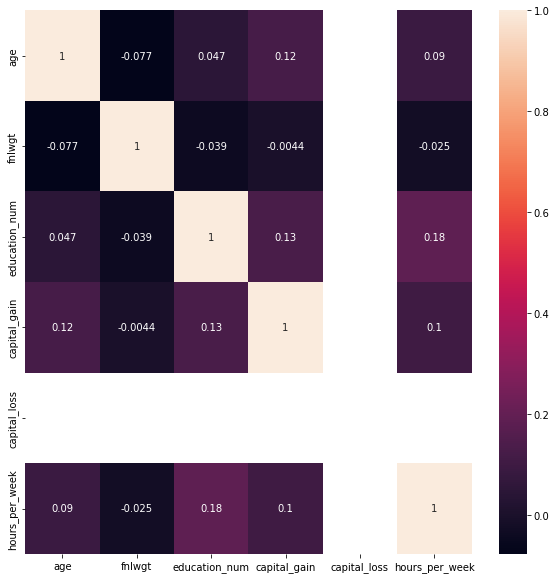

In [164]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot= True)

In [165]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


In [166]:
feature_engineering(df)

In [167]:
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
8903,40,6,190290,0,13.0,1,5,1,0,1,0.0,0.0,40.0,4,1
2235,43,2,160815,7,11.0,2,3,4,0,0,0.0,0.0,40.0,0,0
3261,26,2,108658,1,9.0,0,6,0,0,1,0.0,0.0,40.0,0,0
21555,50,0,78649,5,10.0,3,0,4,3,0,0.0,0.0,40.0,0,0
9901,29,2,29732,0,13.0,1,3,2,0,0,0.0,0.0,32.5,0,0


<AxesSubplot:>

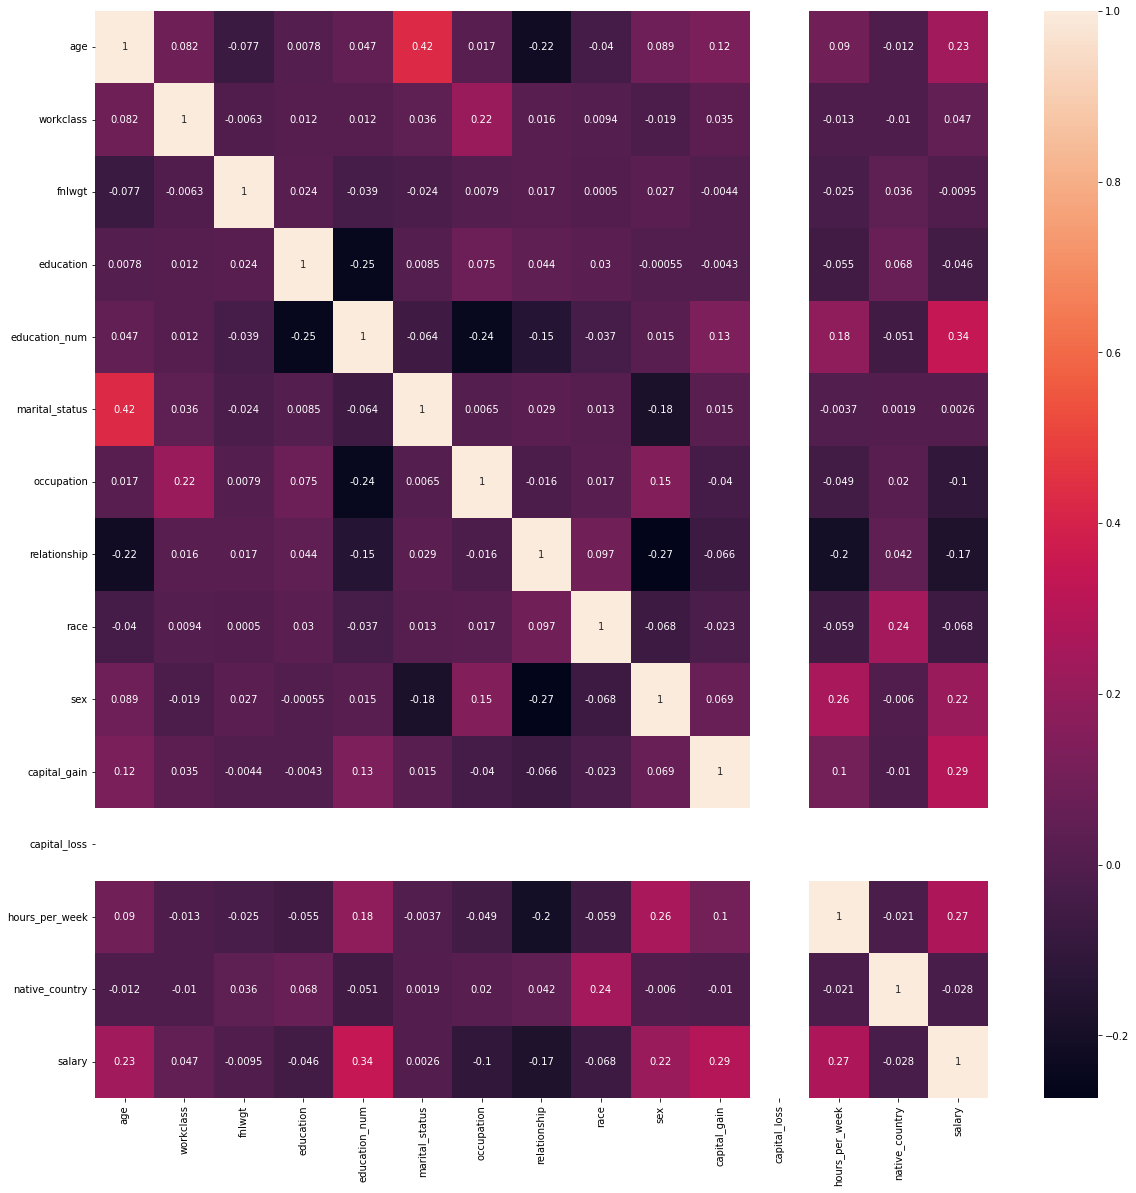

In [168]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,annot=True)

In [171]:
df = df.drop(['fnlwgt','capital_loss'], axis=1)

In [174]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,1,7.684324,40.0,0,0
1,50,1,0,13.0,1,1,1,0,1,0.000000,32.5,0,0
2,38,2,1,9.0,2,2,0,0,1,0.000000,40.0,0,0
3,53,2,2,7.0,1,2,1,1,1,0.000000,40.0,0,0
4,28,2,0,13.0,1,3,2,1,0,0.000000,40.0,1,0


In [ ]:
!pip install sklearn

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [179]:
sc = StandardScaler()

In [181]:
X = df[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'hours_per_week', 'native_country']]

In [182]:
Y = df['salary']

In [183]:
Y.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [184]:
X = sc.fit_transform(X)

In [185]:
X

array([[ 0.03067056, -1.88460023, -0.99158435, ...,  2.83125725,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -0.99158435, ..., -0.29926996,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198, -0.70202542, ..., -0.29926996,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.70202542, ..., -0.29926996,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198, -0.70202542, ..., -0.29926996,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452, -0.70202542, ...,  3.61877739,
        -0.194354  , -0.25574647]])

In [186]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [187]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (26048, 12)
Test data shape: (6513, 12)


In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
lg_model = LogisticRegression()

In [190]:
lg_model.fit(X_train,Y_train)

LogisticRegression()

In [191]:
Y_pred = lg_model.predict(X_test)

In [193]:
result = {'Actual': Y_test, 'Predicted':Y_pred}
Result = pd.DataFrame(result)
Result

,Actual,Predicted
14160,0,0
27048,0,0
28868,1,1
5667,0,0
7827,0,1
...,...,...
1338,0,1
24534,1,0
18080,1,1
10354,0,0


In [194]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [195]:
print("Accuracy Score: {}".format(accuracy_score(Y_test, Y_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(Y_test, Y_pred)))
print("Classification Report:\n {}".format(classification_report(Y_test, Y_pred)))

Accuracy Score: 0.8182097343773991
Confusion Matrix:
 [[4626  316]
 [ 868  703]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4942
           1       0.69      0.45      0.54      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513

